# Numpy

Used for matrix math, Numpy introduces matrices for python, numpy arrays will only store one type of data such as a float to help optimise memory.

Becuase of how useful matricies are Numpy is used in almost every third party libary. It even has a reserved symbol for matrix multiplication

[Explanation on matrix multiplication and dot product](https://mkang32.github.io/python/2020/08/23/dot-product.html)

[Numpy site](https://numpy.org/)

In [179]:
import numpy as np

array = np.arange(20)
array


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [180]:
matrix_0 = np.array(2)
matrix_1 = np.array([[1, 2], [3, 4]]) # create matrix
matrix_2 = np.array([[5, 6], [7, 8]])
matrix_3 = np.ones((2,2))
matrix_4 = np.zeros((2,2))

matrix_2

array([[5, 6],
       [7, 8]])

## Multiply two matricies together

With matrix multiplication and dot products the order of multiplication matters.

In [181]:
print(matrix_2 @ matrix_1)
print()
print(matrix_1 @ matrix_2)

[[23 34]
 [31 46]]

[[19 22]
 [43 50]]


# Dot product

In [182]:
np.dot(matrix_1, matrix_3)

array([[3., 3.],
       [7., 7.]])

# Scipy

Scipy is an open source libary for scientific computing and engineering. It extends the numpy libary.

Scipy can be divided into subpackages with each one serving a different purpose. 

[Full list here](https://docs.scipy.org/doc/scipy/tutorial/index.html)

[Scipy minimise](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

In [183]:
from scipy import optimize
import math

# Optimize finds the minimum of any function
# it is a unified interface for finding the local minimums of optimization problems

def func1(x):
    # Graphed equation : https://www.desmos.com/calculator/rdxwwggo6i
    return (2*x) + (x * math.sin(x))/math.tan(x) + math.e**(-x)


x_0=5.0
# Minimise defualts to only positive bounds, if you input a negative it will find negative solutions
output = optimize.minimize(func1,x_0,)
output

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.021713842692517
        x: [ 2.770e+00]
      nit: 7
      jac: [-5.096e-06]
 hess_inv: [[ 5.170e-01]]
     nfev: 18
     njev: 9

`optimize.minimize` returns a data structure with the result. 

x is the input.

and fun is the output, or y on a graph

`optimize.minimize` also has other inputs where we can constrain it to solve within certain bounds or conditions that we define.

In [184]:
# get the input as a numpy array
print(output.x)
# get the output of function at x
print(output.fun)
# output.fun is same as
print(func1(output.x[0]))

[2.77010104]
3.021713842692517
3.021713842692517


# Matplotlib

Matplotlib is widely used and you'll see this more often than not. matplotlib is very versitile and is able to interpret data in many ways depending on the graph you want to show, I reccomend visiting the site and exploring it on your own

Matplotlib comes orginally from MATLAB, an old statistical programming language.

[Visit the site](https://matplotlib.org/stable/)

or view the cheatsheet below

<div>
<img src="matplotlib-beginner.webp" width="1000"/>
</div>

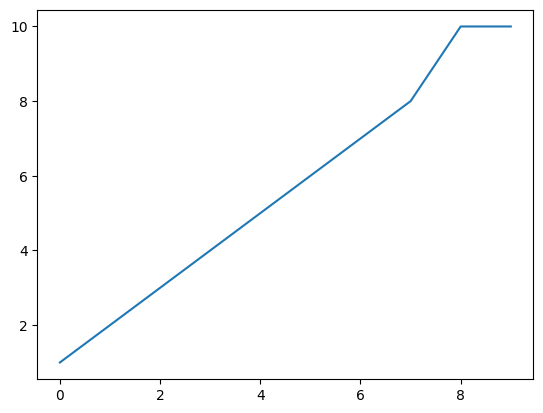

In [185]:
import matplotlib.pyplot as plt

data = [1,2,3,4,5,6,7,8,10,10]
plt.plot(data) # add the data to the plot
plt.show() # show the plot

# Pandas, yfinance and plotly

Pandas is used to manipulate datasets in python. Pandas uses a "dataframe" object which is used to manipulate or handle multiple columns of data. The pandas libary is a tool not a method, its more effective to learn and understand the statistical methods you are going to use than to only learn pandas.

- [Pandas dataframe docs](https://pandas.pydata.org/docs/reference/frame.html)

yfinance is used to gather stock data from yahoo finance.

- [yfinance on pypi](https://pypi.org/project/yfinance/)

Plotly is similar to matplotlib but offers more interactive graphs.

- [Plotly docs](https://plotly.com/python/)

- [Plotly cheatsheet](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf)

In [186]:
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go
from math import floor

The dataframe object is tabular, it uses columns and rows to store data and there is a decent crossover between excel and pandas because of this.

In [187]:
# Pandas can interpret different data structures to build a dataframe, dictionaries are the best but lists work too, although you need to pass in `columns=[]` to pd.DataFrame to name them if you use lists.
data = {"Product": ["Apples", "Bananas", "Cherries"], "Price" : [0.7, 2, 3]}
# data = [["Apples",0.7], ["Bananas",2], ["Cherries",3]]

dataframe = pd.DataFrame(data)
dataframe

,Product,Price
0,Apples,0.7
1,Bananas,2.0
2,Cherries,3.0


Pandas automatically assigns the datatype of a column, Columns can only be a single type, this is becuase pandas uses numpy to store the values in a column, use `.info()` to get types, count of rows and memory usage. Dtype is the data type.

The left most column is the index and can be defined by passing in a list to `index=[]` otherwise it starts from 0 and increments for every row.

In [188]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  3 non-null      object 
 1   Price    3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 180.0+ bytes


Data is primarily accessed by columns, not rows, you get specific columns by passing in the column name as a key (like a dictionary) and a series is returned, a series is a single column of data.

In [189]:
dataframe["Price"]
# type(dataframe["Price"])

0    0.7
1    2.0
2    3.0
Name: Price, dtype: float64

You can also acces data by position/index using `.iloc[position]` .

In [190]:
dataframe.iloc[1]

Product    Bananas
Price          2.0
Name: 1, dtype: object

# Pandas and (y)Finance

Now we will build a simple mean reversion strategy.

Use yfinance to get the history of a stock.

yf.download has many arguments you can pass in, if you are veiwing this in vscode you can hold CTRL and hover over `download` to see all of them.

Period will start today and go back in time for the set period, in this case: a year.

You can use any ticker on yfinance, some tickers may have .L or another letter, this is for the different exchanges.

`download` will return a pandas dataframe with the columns `Open`, `High`, `Low`, `Close`, `Adj Close`, `Volume`

In [191]:

TICKER = "MSFT"
stock_data = yf.download(TICKER,period="1y",repair=True)

# .describe() gives us statistics on the dataset for each column, by removing .describe() jupyter presents the dataframe
stock_data.describe()

# we can also use .head(x) for the first x rows
stock_data.head(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Repaired?
Date,,,,,,,
2022-10-21,234.740005,243.000000,234.500000,242.119995,239.803314,26299700,False
2022-10-24,243.759995,247.839996,241.300003,247.250000,244.884232,24911200,False
2022-10-25,247.259995,251.039993,245.830002,250.660004,248.261597,34775500,False
2022-10-26,231.169998,238.300003,230.059998,231.320007,229.106659,82543200,False
2022-10-27,231.039993,233.690002,225.779999,226.750000,224.580353,40424600,False


We can veiw the price stock history with plotly. Plotly adds interactivity to the graph such as zoom.

Since we only have daily prices the resolution is not great, so dont zoom too far in.

In [192]:
fig = go.Figure()

# Graph
fig.add_trace(go.Scatter(x=stock_data.index.format(""),y=stock_data["Adj Close"], name=TICKER))

# Buttons
fig.update_layout(title=f"Stock price of {TICKER}", 
                  xaxis=dict(rangeslider=dict(visible=True),type="category",tickformat = "%d, %Y", dtick = 100)
                  )

fig.show()

We only need `Adj Close` for our next sections 

In [193]:
# Use "Adj Close" over "Close" as Adj takes into account stock splits and dividends, we dont need the other columns.
stock_data = stock_data["Adj Close"].to_frame() # use .to_frame() otherwise a Series is returned

Pandas has many methods that can be applied directly to the dataframe, one of those is .pct_change() which gets the change between each datapoint in the column, in our case it is the share price movement. See pandas docs for more

In [194]:
print(stock_data.pct_change()) # share price movement
print("\n--- .std()\n")
print(stock_data.std()) # standard deviation of each column
print("\n--- .mean()\n")
print(stock_data.mean()) # mean of each colmn

            Adj Close
Date                 
2022-10-21        NaN
2022-10-24   0.021188
2022-10-25   0.013792
2022-10-26  -0.077156
2022-10-27  -0.019756
...               ...
2023-10-16   0.014982
2023-10-17  -0.001744
2023-10-18  -0.005872
2023-10-19   0.003666
2023-10-20  -0.014035

[251 rows x 1 columns]

--- .std()

Adj Close    40.684787
dtype: float64

--- .mean()

Adj Close    288.898766
dtype: float64


we can find the moving average by using `.rolling(periods)` which creates a moving window for applying `.mean()` or the other methods

In [195]:
rolling = stock_data.rolling(5)
# print(rolling)
# for i in rolling: # Rolling is a similar to range(), to view it fully iterate over it or pass it into list()
    # print(i)

rolling_mean = rolling.mean()

In [196]:
# Plot rolling mean
stock_data["rolling mean"] = rolling_mean

fig = go.Figure()
fig.add_trace(go.Scatter(x=stock_data.index,y=stock_data["Adj Close"], name=TICKER))
fig.add_trace(go.Scatter(x=stock_data.index,y=stock_data["rolling mean"], name = "Rolling mean"))

fig.update_layout(title=f"Stock price of {TICKER}", 
                  xaxis=dict(rangeslider=dict(visible=True),type="category",tickformat = "%d, %Y", dtick = 100)
                  )

fig.show()

Mean reversion strategies rely on the fact that the stock price should always return to the mean at some point, If we buy below the mean and sell above the mean we can hope to make profit, the further the stock price moves from the mean the more likely you are to take a profit as it is more likely to go back. However we cant do this every time it drops below otherwise we will incur trading fees larger than the stock movement so the differnece has to be large enough but the larger the difference the less likely it is to occur as stock price movements are normally distributed.

To create the bands that to trade at create two new columns called `"high"` and `"low"`. This is done by assignment like its a dictionary.

```python
data["test"] = 60 * 1.02
```

Our high and low bands will be defined as a percentage of the rolling mean. Pandas applies the math to all rows so you dont need to iterate over the rows.

In [197]:
stock_data["high"] = stock_data["rolling mean"] * 1.02
stock_data["low"] = stock_data["rolling mean"] * 0.98
stock_data

,Adj Close,rolling mean,high,low
Date,,,,
2022-10-21,239.803314,NaN,NaN,NaN
2022-10-24,244.884232,NaN,NaN,NaN
2022-10-25,248.261597,NaN,NaN,NaN
2022-10-26,229.106659,NaN,NaN,NaN
2022-10-27,224.580353,237.327231,242.073775,232.580686
...,...,...,...,...
2023-10-16,332.640015,330.468011,337.077372,323.858651
2023-10-17,332.059998,331.202008,337.826048,324.577968
2023-10-18,330.109985,330.740002,337.354802,324.125202


In [198]:

fig = go.Figure()

fig.add_trace(go.Scatter(x=stock_data.index,y=stock_data["Adj Close"], name=TICKER))
fig.add_trace(go.Scatter(x=stock_data.index,y=stock_data["rolling mean"], name="mean"))
fig.add_trace(go.Scatter(x=stock_data.index,y=stock_data["high"], name="high"))
fig.add_trace(go.Scatter(x=stock_data.index,y=stock_data["low"],name="low"))

fig.update_layout(title=f"Stock price of {TICKER}", 
                  xaxis=dict(rangeslider=dict(visible=True),type="category",tickformat = "%d, %Y", dtick = 100))

fig.show()


Pandas can also apply comparisons to all the rows at once, if you are using comparisons a series of True and False will be returned where the values meet the conditions. You can then use `.loc[]` to filter out the positions using the previously created series as a filter.

The code below finds all the possible buy and sell opportunities based on our parameters.

In [199]:
filt = stock_data["Adj Close"] <= stock_data["low"] # Buy low
buys = stock_data.loc[filt]

filt = stock_data["Adj Close"] >= stock_data["high"] # Sell high
sells = stock_data.loc[filt]

print("buys")
print(buys.describe())
print("\nsells")
print(sells.describe())

buys
        Adj Close  rolling mean        high         low
count   19.000000     19.000000   19.000000   19.000000
mean   256.245634    264.760853  270.056070  259.465636
std     40.818884     40.803867   41.619944   39.987790
min    212.199982    223.940552  228.419363  219.461741
25%    226.063858    235.380901  240.088519  230.673283
50%    243.031708    250.325922  255.332440  245.319403
75%    265.595856    273.737979  279.212739  268.263220
max    337.056366    344.171307  351.054734  337.287881

sells
        Adj Close  rolling mean        high         low
count   37.000000     37.000000   37.000000   37.000000
mean   280.058547    271.394790  276.822686  265.966894
std     38.798928     37.996610   38.756542   37.236678
min    225.689651    220.228418  224.632986  215.823850
25%    252.963913    245.290274  250.196080  240.384469
50%    264.301392    255.112991  260.215251  250.010732
75%    317.847046    311.472754  317.702209  305.243299
max    358.730469    345.332849  352

Now we need to back test our strategy to see if it works. First declare the variables we want to track

In [200]:
start_balance = 1_000
balance = start_balance

position = 0            # Tracks the shares owned.
trades = 0              # Tracks trades closed.
trading_fee = 0.001     # Fee for trading is a flat percentage of the price, this increases the price when buying and decreases our selling price.

Next iterate over the rows entering and exiting postions based on the high and low bands we previously created.

In [201]:
for index, row in stock_data.iterrows():
    # skip over rows which dont have a value.
    if pd.isnull(row["rolling mean"]):
        continue

    # If we have a position open, sell if the price is above high band.
    if position:
        if row["Adj Close"] >= row["high"]:

            balance += position * row["Adj Close"] * (1 - trading_fee)  # Sell the position by adding the current value of shares to balance.
            trades += position
            position = 0 # Lastly set the position to zero

    # If we are not in a position, open a postition only if the price is below low band.
    elif not position:
        if row["Adj Close"] <= row["low"]:
            # Check if we have enough cash to enter a position of at least 1 share.
            if balance >= row["Adj Close"]:
                # amount of shares to buy, no fractional shares so use math.floor.
                buy_shares = floor(balance / row["Adj Close"])
                # buy_shares = 1 # set to only buy one share.

                # calculate risk management and hedge here.
                # There is no hedging or risk management in this example, we just go all in everytime we see a buy signal.

                # Purchase the assets by subtracting the value of shares, then adding the shares to the position.
                balance -= buy_shares * row["Adj Close"] * (1 + trading_fee)
                position += buy_shares

            else:
                # If we break the loop now the share price could drop to a level we can purchase later.
                print(f"{index} : Not enough money to purchase")
                

# Force close the position at end for easier comparison.
if position > 0:
    balance += position * row["Adj Close"] * (1 - trading_fee) # Sell.
    trades += position
    print(f"{position} postions forcibly closed")
    position = 0


# output the results of trading.
profit = balance - start_balance
returns = (profit / start_balance) * 100

print(f"Closing Balance          :  {round(balance,2):,}")
print(f"Return on start balance  :  {round(returns,2)}%")
print(f"shares traded            :  {trades}")
print(f"average profit per trade :  {round(profit/trades, 4)}")

Closing Balance          :  1,129.95
Return on start balance  :  13.0%
shares traded            :  29
average profit per trade :  4.4812


The reason why a simple moving average (SMA) can be profitable is because it follows the overall trend of the stock, but SMA can quickly become un-profitable, if the asset goes into a down trend. 

When the asset is in a down trend lower prices are more likely so the program will continue to buy until you run out of money or you stop it. Furthermore becuase it follows trends it is unable to take advantage of sudden changes in prices at all. These sudden changes such as a reaction to a company under or overperforming in a quater, are when miss-pricings can occur due to the initial reaction, the SMA misses out on these chances to create any extra return due to the data for that day having a reduced effect on the moving average. This is why quantitative hedge funds can be more profitable during volatile periods, they take advantage of market miss-pricing.

You'll never make an overall profit in a downtrend becuase the next sell will be above the high band, but still lower than your previous buy price.

For example a smarter algorithm would:
- Take in to account a larger trend or the momentum.
- Enter postions based on price formations instead of trends.
- Manage risk/uncertainty

When testing your strategy you need to account for trading costs, costs can be anything such as the broker taking a fee or running costs like server fees. These can turn a simple algorthim into something that will never be profitable with even a low fee.

Trading strategies also need to account for factors other than just trading costs, for example slippage can become deadly with high frequency trading. Slippage is the difference in price between the program receiving data and sending out the trade request, by the time the exchange recieves the request there will be a new price. This is why firms will have their servers hosting the trading bot physically closer to the exchange, to minimise the time it takes for the information to travel as they have already fully optimised the software.

Just because it is profitable doesn't mean it is good either. For long only strategies we can compare it to just holding the same asset over the same period of time. The return on investment here is always lower than the overall price movement because this bot incurs more trading fees than just buying once and it isn't always in a postion or it makes a bad decision.

When your making a bot you can only use past data. e.g. If you were to use the `high` column in your algorithm for intraday trading you would need to know ahead of time the highest price for the day. But if you were doing a longer term trading strategy it would be possible to use previous day's high's to create a trend.

The model created here is a simplified version of bollinger bands. Instead of using a fixed percentage offset of average price, bollinger bands use z-values/z-score to determine outliers in pricing.

In [202]:
initial = stock_data["Adj Close"][0] * (1 + trading_fee)
final = stock_data["Adj Close"].tail(1)[0] * (1 - trading_fee)

pct_change = ((final  - initial) / initial) * 100

print("Buy and hold return : ",round(pct_change, 2),"%")

Buy and hold return :  35.95 %


# Saving and Loading data

Pandas can save and load data from various file types, when loading in data you may need to specify the index. Below saves the data in the current working directory, with the name : `stock data` .

The file extention needs to be included.

I reccomend reading from a file instead of downloading everytime, this allows you to debug any errors in the downloaded data and get consistent results while building. 

You should seperate out the downloading into another python file, this makes it easier to edit or replace the downloading process later.

In [203]:
stock_data.to_csv("stock data.csv")
# stock_data = pd.read_excel("examplefile.xlsx") # returns a pandas dataframe with the data from the excel file

# Importing your own work

You can create your own modules and import other python files that you created, you can simply use import (if they are in the same directory) as they are already on your computer.

Example:

---

```python
import downloader

data = downloader.download()

# do stuff with the data...
```

# Other libaries worth mentioning

[openpyxl](https://openpyxl.readthedocs.io/en/stable/#)
- Reading and writing excel documents.

[PyPDF2](https://pypi.org/project/PyPDF2/)
- PDF reading and manipulation.

[Tensorflow](https://www.tensorflow.org/) (or [pytorch](https://pytorch.org/))
- Neural networks and deep learning.

[Scikit-learn](https://scikit-learn.org/stable/)
- Machine learning tools.

[Pytest](https://docs.pytest.org/en/7.4.x/)
- Unit testing for python (making sure code behaves as expected... by writing more code).

[Json](https://www.json.org/json-en.html) (built in)
- JSON (Java script object notation) serialisation. A filetype and system for saving data which is human readable.

[Pickle](https://docs.python.org/3/library/pickle.html) (built in)
- Object serialisation, not human readable but can be easier to save python objects with.

> Serialisation
>
> the process of converting the state of an object into a form that can be persisted or transported.

